<a href="https://colab.research.google.com/github/lohith1266/oasis-infobyte-intership-Data-Anallytics/blob/main/Task_5_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (5, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data after encoding:
       price  area  bedrooms  bathrooms  stories  main

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


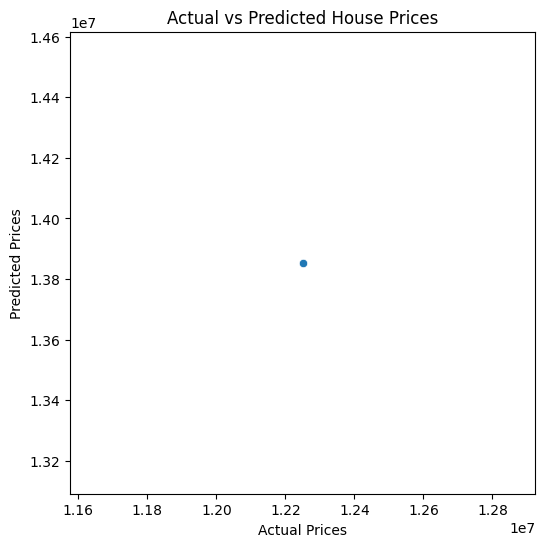


Example House Features:
 area                8960
bedrooms               4
bathrooms              4
stories                4
mainroad               0
guestroom              0
basement               0
hotwaterheating        0
airconditioning        1
parking                3
prefarea               0
furnishingstatus       0
Name: 1, dtype: int64
Predicted Price: 13853872.678084739


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset
df = pd.read_excel("/content/Housing_Dataset.xlsx")

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
# Convert categorical columns to numerical using Label Encoding
categorical_cols = ['mainroad', 'guestroom', 'basement',
                    'hotwaterheating', 'airconditioning',
                    'prefarea', 'furnishingstatus']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nData after encoding:\n", df.head())

# Step 4: Define Features (X) and Target (y)
X = df.drop("price", axis=1)
y = df["price"]

# Step 5: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("RMSE:", rmse)
print("R-squared:", r2)

# Step 9: Visualization
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Step 10: Example Prediction
sample_house = X_test.iloc[0].values.reshape(1, -1)
pred_price = model.predict(sample_house)
print("\nExample House Features:\n", X_test.iloc[0])
print("Predicted Price:", pred_price[0])
